## 실습1

In [1]:
from glob import glob
import pandas as pd

# 10개의 엑셀 파일 이름을 all_files 리스트에 저장
all_files = glob('./myCabinetExcelData/*')


# 파일을 열고 데이터 프레임을 리스트에 담고 아래방향으로 concat해서 하나로 합치기
all_files_data = [] 
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
# 전부 합치기
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

# 제목 추출
all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [2]:
import re # 정규식을 사용하기 위한 모듈
from nltk.corpus import stopwords # 불용어 정보를 제공하는 모듈
from nltk.stem import WordNetLemmatizer # 표제어 추출을 제공하는 모듈
from nltk.tokenize import word_tokenize # 단어 토큰화 작업을 위한 모듈
from collections import Counter


# 영어 불용어와 WordNetLemmatizer
stopWords = set(stopwords.words("english")) 
lemma = WordNetLemmatizer()

# 단어 1 생성 : 데이터 전처리할 단어 목록
words = []
for title in all_title:
    EnWords = re.sub("[^a-zA-Z]+", " ", str(title)) # 알파벳이 아닌 문자 제거
    EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로 정규화,단어 토큰화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] #불용어를 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 추출
    words.append(EnWordsTokenStopLemma)
words

# 단어 3 생성 : 데이터 전처리하여 사용할 단어 목록
from functools import reduce
words3 = reduce(lambda x, y: x+y, words)
words3

['guest',
 'editorial',
 'big',
 'medium',
 'data',
 'understanding',
 'search',
 'mining',
 'part',
 'guest',
 'editorial',
 'big',
 'scholar',
 'data',
 'discovery',
 'collaboration',
 'guest',
 'editorial',
 'big',
 'data',
 'analytics',
 'web',
 'parallel',
 'computing',
 'preserving',
 'privacy',
 'using',
 'k',
 'anonymisation',
 'algorithm',
 'big',
 'data',
 'nosql',
 'database',
 'big',
 'data',
 'computation',
 'migration',
 'new',
 'approach',
 'execute',
 'big',
 'data',
 'bioinformatics',
 'workflow',
 'towards',
 'real',
 'time',
 'big',
 'data',
 'analytics',
 'platform',
 'health',
 'application',
 'new',
 'approach',
 'accurate',
 'distributed',
 'cluster',
 'analysis',
 'big',
 'data',
 'competitive',
 'k',
 'mean',
 'five',
 'layer',
 'architecture',
 'big',
 'data',
 'processing',
 'analytics',
 'towards',
 'max',
 'min',
 'fair',
 'resource',
 'allocation',
 'stream',
 'big',
 'data',
 'analytics',
 'shared',
 'cloud',
 'large',
 'scale',
 'spectral',
 'clustering'

In [3]:
count = Counter(words3)
word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
# 단어 빈도수 생성
word_count_all = word_count.copy() #big, data 포함
word_count                         #big, data 제외

# big, data 삭제
del word_count['big']
del word_count['data']

# 정렬하기
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

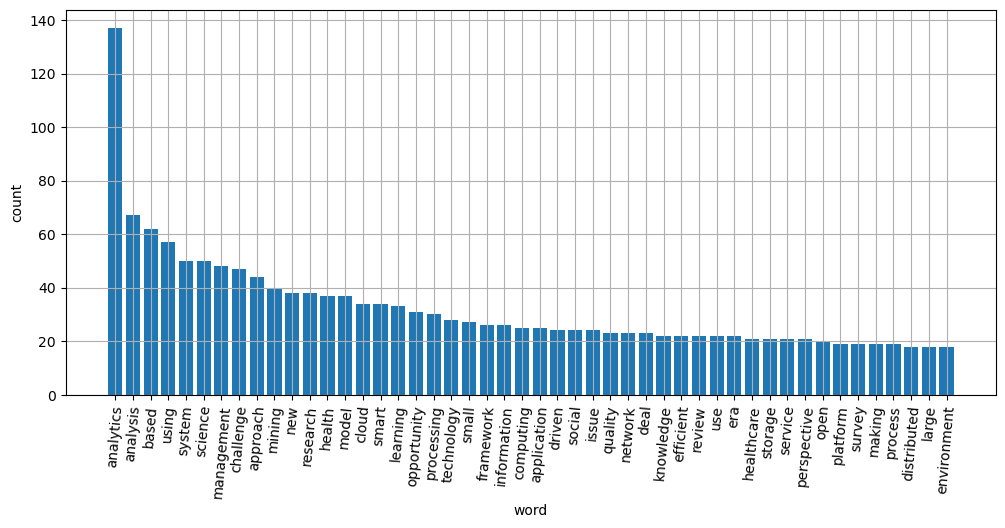

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.bar(range(len(word_count)), sorted_Values)
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)

# x축 레이블 지정, y축 레이블 지정
plt.xlabel('word') 
plt.ylabel('count')

# 그리드 표시
plt.grid(True)

plt.show()

## 실습 2

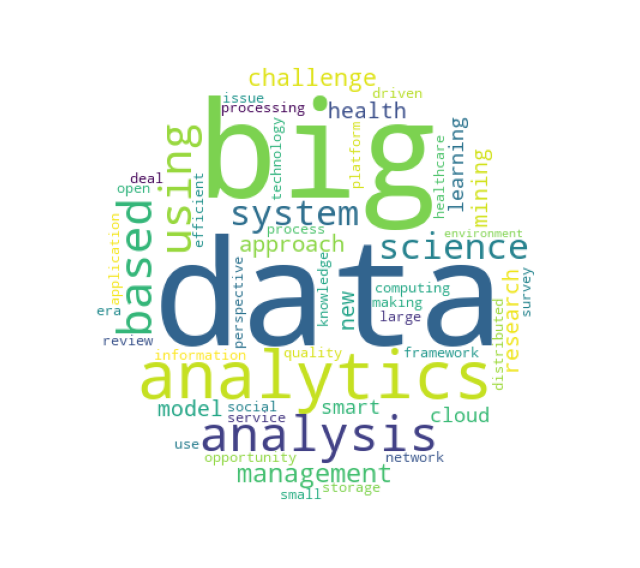

In [5]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

# 원모양 마스크 이미지 배열처리
mask_image = np.array(Image.open("circle_mask.png"))

# 워드클라우드 생성
wc=WordCloud(background_color='white', width=800, mask = mask_image,height=600,random_state=6)
cloud=wc.generate_from_frequencies(word_count_all)

# 사이즈지정
plt.figure(figsize=(8,8))
# 이미지 출력함수
plt.imshow(cloud)
# 축과 라벨 이름 제거
plt.axis('off') 
plt.show()

## 실습 3

In [6]:
# 클린턴 1993 신년연설 로딩
with open('1993_clinton.txt','r',encoding = 'utf-8') as f:
    clinton = f.read()

# 단어 전처리
words = []
EnWords = re.sub("[^a-zA-Z]+", " ", str(clinton)) # 알파벳이 아닌 문자 제거
EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로 정규화,단어 토큰화
EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] #불용어를 제거
EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 추출
words.append(EnWordsTokenStopLemma)
words = words[0]

# 빈도수 Counter 후 80개 중에 공백 길이가 2이상인 것 추출
count = Counter(words)
word_count = dict() # 단어 빈도수 생성 
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts

# word_count 정렬하기
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

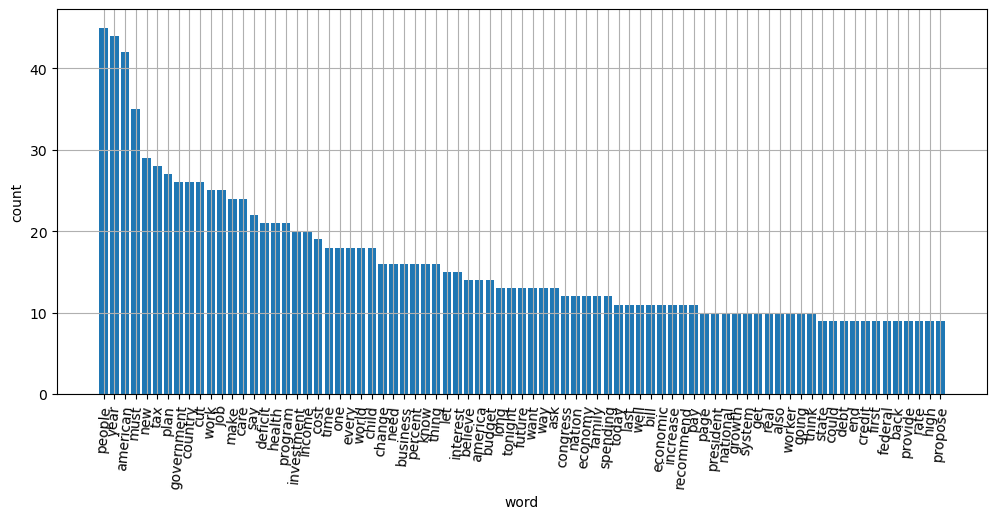

In [7]:
plt.figure(figsize=(12,5))
plt.bar(range(len(word_count)), sorted_Values)
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)

# x축 레이블 지정, y축 레이블 지정
plt.xlabel('word') 
plt.ylabel('count')

# 그리드 표시
plt.grid(True)

plt.show()

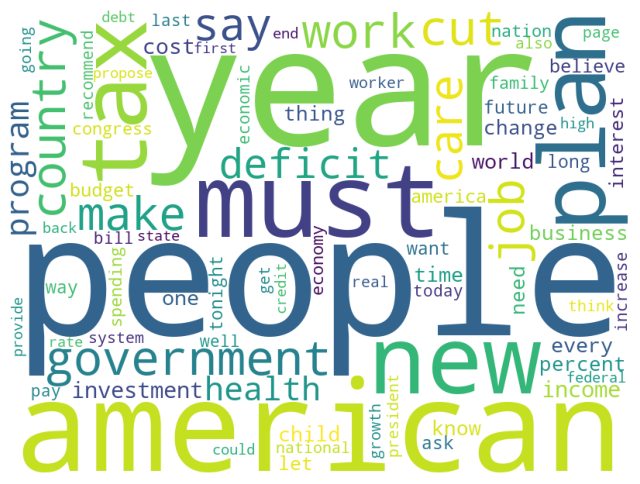

In [8]:
# 워드클라우드 생성
wc=WordCloud(background_color='white', width=800,height=600,random_state=6)
cloud=wc.generate_from_frequencies(word_count)

# 사이즈지정
plt.figure(figsize=(8,8))
# 이미지 출력함수
plt.imshow(cloud)
# 축과 라벨 이름 제거
plt.axis('off') 
plt.show()

In [9]:
# 부시 2002 신년연설 로딩
with open('2002_bush.txt','r',encoding = 'utf-8') as f:
    clinton = f.read()

# 단어 전처리
words = []
EnWords = re.sub("[^a-zA-Z]+", " ", str(clinton)) # 알파벳이 아닌 문자 제거
EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로 정규화,단어 토큰화
EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] #불용어를 제거
EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 추출
words.append(EnWordsTokenStopLemma)
words = words[0]

# 빈도수 Counter 후 80개 중에 공백 길이가 2이상인 것 추출
count = Counter(words)
word_count = dict() # 단어 빈도수 생성 
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts

# word_count 정렬하기
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

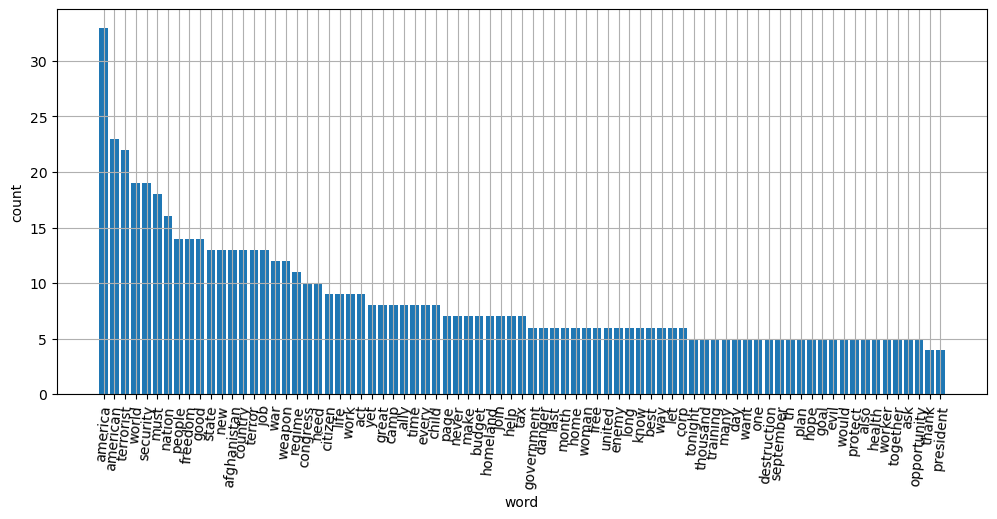

In [10]:
plt.figure(figsize=(12,5))
plt.bar(range(len(word_count)), sorted_Values)
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)

# x축 레이블 지정, y축 레이블 지정
plt.xlabel('word') 
plt.ylabel('count')

# 그리드 표시
plt.grid(True)

plt.show()

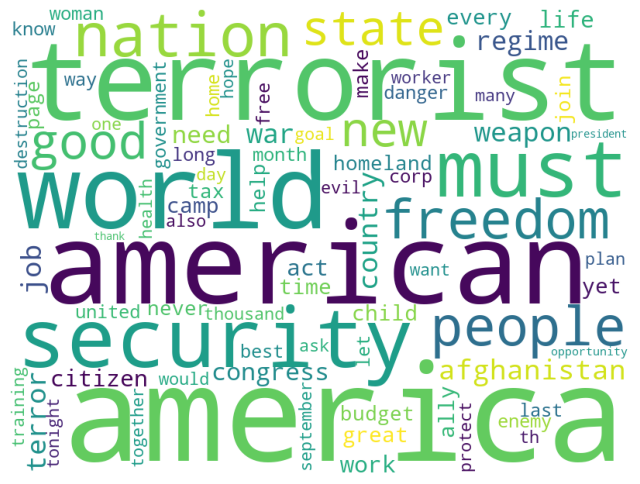

In [11]:
# 워드클라우드 생성
wc=WordCloud(background_color='white', width=800,height=600,random_state=6)
cloud=wc.generate_from_frequencies(word_count)

# 사이즈지정
plt.figure(figsize=(8,8))
# 이미지 출력함수
plt.imshow(cloud)
# 축과 라벨 이름 제거
plt.axis('off') 
plt.show()

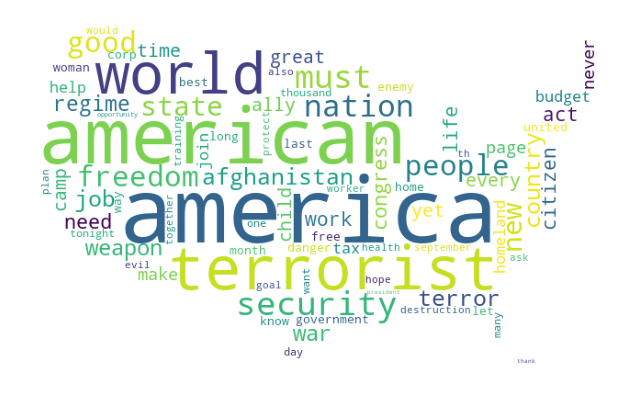

In [12]:
# 미국모양 마스크 이미지 배열처리
mask_image = np.array(Image.open("america.png"))

# 워드클라우드 생성
wc=WordCloud(background_color='white', mask = mask_image,width=800,height=600,random_state=6)
cloud=wc.generate_from_frequencies(word_count)

# 사이즈지정
plt.figure(figsize=(8,8))
# 이미지 출력함수
plt.imshow(cloud)
# 축과 라벨 이름 제거
plt.axis('off') 
plt.show()

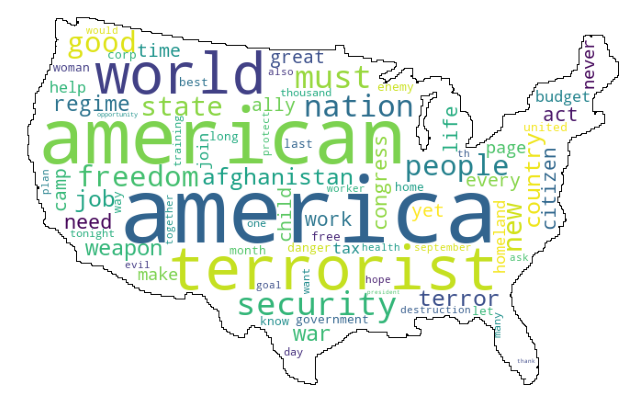

In [13]:
# 미국모양 마스크 이미지 배열처리
mask_image = np.array(Image.open("america.png"))

# 워드클라우드 생성
wc=WordCloud(background_color='white', mask = mask_image,width=800,height=600,\
             contour_width=1, contour_color="black",random_state=6)
cloud=wc.generate_from_frequencies(word_count)

# 사이즈지정
plt.figure(figsize=(8,8))
# 이미지 출력함수
plt.imshow(cloud)
# 축과 라벨 이름 제거
plt.axis('off') 
plt.show()

## 실습 4
추가로 실습4. 한글 키워드 분석 워드클라우드 시각화(슬라이드 67)

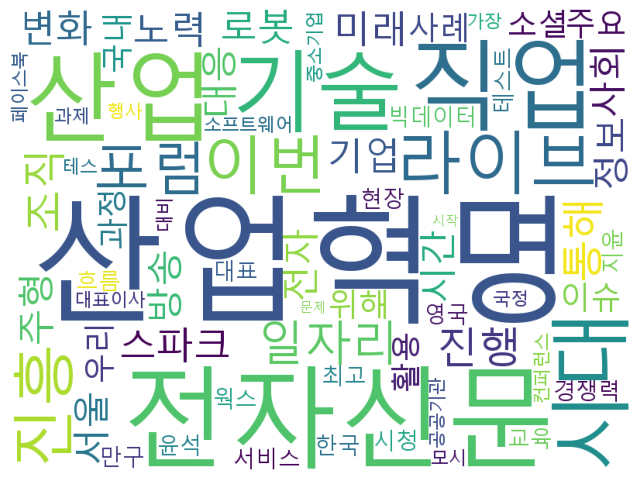

In [14]:
# 4차산업혁명 json 로딩
import json
inputFileName = 'etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json'
with open(inputFileName, 'r', encoding='utf-8') as in_json:
    data = json.load(in_json)

# Json의 text화
import re
message = ''
for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['message'])
message

# 단어로 잘게 쪼개기
from konlpy.tag import Okt
okt = Okt()
message_N = okt.nouns(message)
message_N

# 단어 빈도수 체크 후 사전에 입력
from collections import Counter
count = Counter(message_N)

word_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        
# 워드 클라우드
font_path = "c:/Windows/fonts/malgun.ttf"
wc = WordCloud(font_path, background_color='white', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()